**Import libraries**

In [ ]:
import pandas as pd
import numpy as np 
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer,mean_squared_error
from sklearn.metrics import roc_curve, mean_squared_error, homogeneity_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import RocCurveDisplay
from joblib import dump, load
from sklearn.manifold import TSNE

**Import dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
forensics = pd.read_csv(io.BytesIO(uploaded['VMResourceUtilizationSlope.csv']))



Saving VMResourceUtilizationSlope.csv to VMResourceUtilizationSlope.csv


**Exploratory data analysis**

In [ ]:
forensics.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [ ]:
forensics.shape

(9610, 44)

In [ ]:
forensics.columns

Index(['LAST_POLL', 'VMID', 'UUID', 'dom', 'rxbytes_slope', 'rxpackets_slope',
       'rxerrors_slope', 'rxdrops_slope', 'txbytes_slope', 'txpackets_slope',
       'txerrors_slope', 'txdrops_slope', 'timecpu_slope', 'timesys_slope',
       'timeusr_slope', 'state_slope', 'memmax_slope', 'mem_slope',
       'cpus_slope', 'cputime_slope', 'memactual_slope', 'memswap_in_slope',
       'memswap_out_slope', 'memmajor_fault_slope', 'memminor_fault_slope',
       'memunused_slope', 'memavailable_slope', 'memusable_slope',
       'memlast_update_slope', 'memdisk_cache_slope',
       'memhugetlb_pgalloc_slope', 'memhugetlb_pgfail_slope', 'memrss_slope',
       'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope',
       'vdawr_bytes_slope', 'vdaerror_slope', 'hdard_req_slope',
       'hdard_bytes_slope', 'hdawr_reqs_slope', 'hdawr_bytes_slope',
       'hdaerror_slope', 'Status'],
      dtype='object')

In [ ]:
forensics['Status'].value_counts()

Normal    7288
Attack    2306
Name: Status, dtype: int64

In [ ]:
forensics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LAST_POLL                 9610 non-null   int64  
 1   VMID                      9610 non-null   int64  
 2   UUID                      9610 non-null   object 
 3   dom                       9610 non-null   object 
 4   rxbytes_slope             9594 non-null   float64
 5   rxpackets_slope           9594 non-null   float64
 6   rxerrors_slope            9594 non-null   float64
 7   rxdrops_slope             9594 non-null   float64
 8   txbytes_slope             9594 non-null   float64
 9   txpackets_slope           9594 non-null   float64
 10  txerrors_slope            9594 non-null   float64
 11  txdrops_slope             9594 non-null   float64
 12  timecpu_slope             9594 non-null   float64
 13  timesys_slope             9594 non-null   float64
 14  timeusr_

In [ ]:
forensics.isnull().sum()

LAST_POLL                    0
VMID                         0
UUID                         0
dom                          0
rxbytes_slope               16
rxpackets_slope             16
rxerrors_slope              16
rxdrops_slope               16
txbytes_slope               16
txpackets_slope             16
txerrors_slope              16
txdrops_slope               16
timecpu_slope               16
timesys_slope               16
timeusr_slope               16
state_slope                 16
memmax_slope                16
mem_slope                   16
cpus_slope                  16
cputime_slope               16
memactual_slope             16
memswap_in_slope            16
memswap_out_slope           16
memmajor_fault_slope        16
memminor_fault_slope        16
memunused_slope             16
memavailable_slope          16
memusable_slope             16
memlast_update_slope        16
memdisk_cache_slope         16
memhugetlb_pgalloc_slope    16
memhugetlb_pgfail_slope     16
memrss_s

In [ ]:
forensics = forensics.dropna()

In [ ]:
forensics.isnull().sum()

LAST_POLL                   0
VMID                        0
UUID                        0
dom                         0
rxbytes_slope               0
rxpackets_slope             0
rxerrors_slope              0
rxdrops_slope               0
txbytes_slope               0
txpackets_slope             0
txerrors_slope              0
txdrops_slope               0
timecpu_slope               0
timesys_slope               0
timeusr_slope               0
state_slope                 0
memmax_slope                0
mem_slope                   0
cpus_slope                  0
cputime_slope               0
memactual_slope             0
memswap_in_slope            0
memswap_out_slope           0
memmajor_fault_slope        0
memminor_fault_slope        0
memunused_slope             0
memavailable_slope          0
memusable_slope             0
memlast_update_slope        0
memdisk_cache_slope         0
memhugetlb_pgalloc_slope    0
memhugetlb_pgfail_slope     0
memrss_slope                0
vdard_req_

In [ ]:
# find categorical variables

categorical = [var for var in forensics.columns if forensics[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['UUID', 'dom', 'Status']


In [ ]:
forensics.describe()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
count,9.594000e+03,9594.000000,9594.000000,9594.000000,9594.0,9594.0,9594.000000,9594.000000,9594.0,9594.0,...,9594.000000,9594.000000,9594.000000,9594.000000,9594.0,9594.000000,9594.000000,9594.0,9594.0,9594.0
mean,1.604482e+09,7.551178,88.237795,35.454518,0.0,0.0,31.755948,22.272845,0.0,0.0,...,0.869522,2.360632,31.607359,80.303610,0.0,0.024526,0.056261,0.0,0.0,0.0
std,8.162846e+04,1.731400,0.779002,18.590801,0.0,0.0,41.176777,36.895174,0.0,0.0,...,7.763400,14.373804,27.642737,27.866019,0.0,1.105076,2.249146,0.0,0.0,0.0
min,1.604406e+09,1.000000,58.392500,1.789900,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,1.604424e+09,6.000000,87.797400,26.565100,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,11.309900,89.963100,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,1.604442e+09,8.000000,87.954600,28.072500,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,18.434900,89.983900,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.604589e+09,9.000000,88.264300,30.963800,0.0,0.0,81.275200,23.782000,0.0,0.0,...,0.000000,0.000000,62.650100,89.995100,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.604636e+09,10.000000,89.999900,89.915700,0.0,0.0,90.000000,89.998200,0.0,0.0,...,89.593000,90.000000,89.083800,90.000000,0.0,64.840700,89.992100,0.0,0.0,0.0


In [ ]:
# view the categorical variables

forensics[categorical].head()

,UUID,dom,Status
0,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
1,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
2,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
3,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
4,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal


In [ ]:
# find numerical variables

numerical = [var for var in forensics.columns if forensics[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 41 numerical variables

The numerical variables are : ['LAST_POLL', 'VMID', 'rxbytes_slope', 'rxpackets_slope', 'rxerrors_slope', 'rxdrops_slope', 'txbytes_slope', 'txpackets_slope', 'txerrors_slope', 'txdrops_slope', 'timecpu_slope', 'timesys_slope', 'timeusr_slope', 'state_slope', 'memmax_slope', 'mem_slope', 'cpus_slope', 'cputime_slope', 'memactual_slope', 'memswap_in_slope', 'memswap_out_slope', 'memmajor_fault_slope', 'memminor_fault_slope', 'memunused_slope', 'memavailable_slope', 'memusable_slope', 'memlast_update_slope', 'memdisk_cache_slope', 'memhugetlb_pgalloc_slope', 'memhugetlb_pgfail_slope', 'memrss_slope', 'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope', 'vdawr_bytes_slope', 'vdaerror_slope', 'hdard_req_slope', 'hdard_bytes_slope', 'hdawr_reqs_slope', 'hdawr_bytes_slope', 'hdaerror_slope']


In [ ]:
# view summary statistics in numerical variables

forensics[numerical].describe()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
count,9.594000e+03,9594.000000,9594.000000,9594.000000,9594.0,9594.0,9594.000000,9594.000000,9594.0,9594.0,...,9594.000000,9594.000000,9594.000000,9594.000000,9594.0,9594.000000,9594.000000,9594.0,9594.0,9594.0
mean,1.604482e+09,7.551178,88.237795,35.454518,0.0,0.0,31.755948,22.272845,0.0,0.0,...,0.869522,2.360632,31.607359,80.303610,0.0,0.024526,0.056261,0.0,0.0,0.0
std,8.162846e+04,1.731400,0.779002,18.590801,0.0,0.0,41.176777,36.895174,0.0,0.0,...,7.763400,14.373804,27.642737,27.866019,0.0,1.105076,2.249146,0.0,0.0,0.0
min,1.604406e+09,1.000000,58.392500,1.789900,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,1.604424e+09,6.000000,87.797400,26.565100,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,11.309900,89.963100,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,1.604442e+09,8.000000,87.954600,28.072500,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,18.434900,89.983900,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.604589e+09,9.000000,88.264300,30.963800,0.0,0.0,81.275200,23.782000,0.0,0.0,...,0.000000,0.000000,62.650100,89.995100,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.604636e+09,10.000000,89.999900,89.915700,0.0,0.0,90.000000,89.998200,0.0,0.0,...,89.593000,90.000000,89.083800,90.000000,0.0,64.840700,89.992100,0.0,0.0,0.0


In [ ]:
forensics[numerical].head()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
0,1604455173,7,88.2065,30.1414,0.0,0.0,79.8981,5.5275,0.0,0.0,...,0.0,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0
1,1604455142,7,87.8708,27.3499,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0
2,1604455113,7,87.8865,27.2996,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0
3,1604455082,7,87.8760,27.4076,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0
4,1604455055,7,87.7241,25.8210,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# remove features which has only 0

forensics = forensics.loc[:, (forensics != 0).any(axis=0)]

In [ ]:
forensics.shape

(9594, 25)

In [ ]:
# find numerical variables

numerical = [var for var in forensics.columns if forensics[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 22 numerical variables

The numerical variables are : ['LAST_POLL', 'VMID', 'rxbytes_slope', 'rxpackets_slope', 'txbytes_slope', 'txpackets_slope', 'timecpu_slope', 'timesys_slope', 'timeusr_slope', 'state_slope', 'cputime_slope', 'memminor_fault_slope', 'memunused_slope', 'memusable_slope', 'memlast_update_slope', 'memrss_slope', 'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope', 'vdawr_bytes_slope', 'hdard_req_slope', 'hdard_bytes_slope']


In [ ]:
forensics['Status']=forensics['Status'].replace(['Normal','Attack'],[0,1])

In [ ]:
forensics.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,...,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,79.8981,5.5275,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,24.3045,89.9850,0.0,0.0,0
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0000,0.0000,73.8278,0.0,...,0.0,0.0,0.0,0.0,0.0,5.9061,89.8986,0.0,0.0,0
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,32.8285,89.9897,0.0,0.0,0
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,4.2364,89.8741,0.0,0.0,0
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,22.7510,89.9864,0.0,0.0,0


In [ ]:
# Shamama

In [ ]:
forensics['Status'].value_counts()

0    7288
1    2306
Name: Status, dtype: int64

In [ ]:
colors =['#069AF3','#FF4500','#3f88c5','#ffba08','#d00000']
fig = go.Figure(go.Pie(labels=['Normal','Attack'],values=forensics.Status.value_counts(),name='Attack'))
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16,marker={'colors':colors})
fig.update_layout(height=400, width=400, title_text='<b style="color:#000000;">Percentage of Target Variable</b>')
fig.show()

In [ ]:
df = forensics.drop(['LAST_POLL', 'VMID', 'UUID','dom'], axis=1)

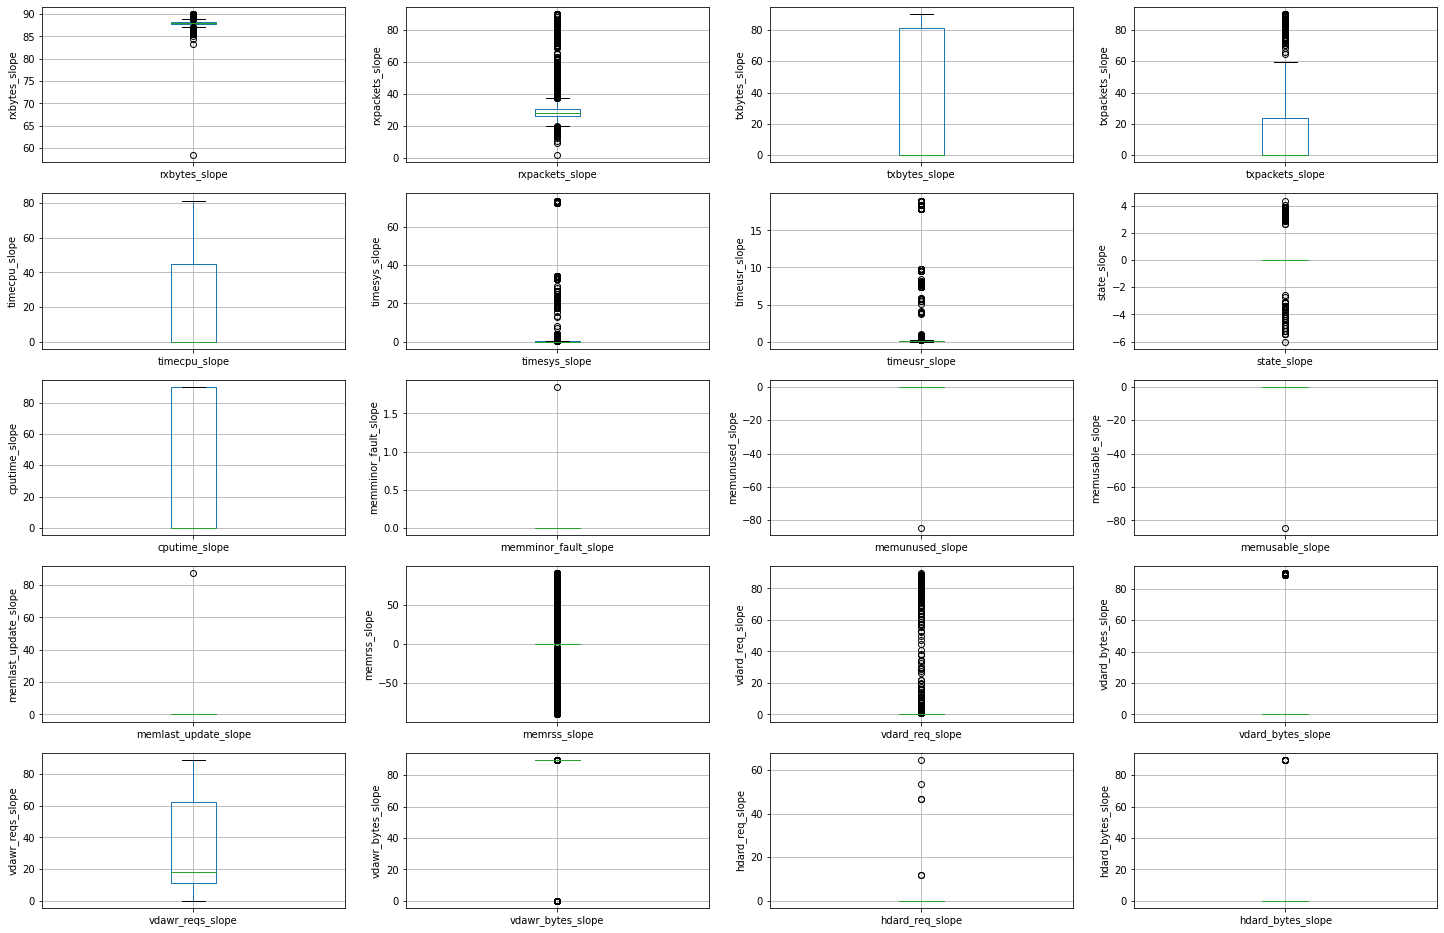

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(25,20))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(6, 4, i+1)
    fig = df.boxplot(column=column)
    fig.set_title('')
    fig.set_ylabel(column)

In [ ]:
df.corr()

,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,...,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope,Status
rxbytes_slope,1.000000,0.891586,0.578981,0.583399,-0.144068,-0.025594,-0.032068,-0.100520,-0.177710,0.011323,...,-0.011323,0.011323,-0.014565,0.070868,0.069281,-0.084335,-0.207916,0.005258,-0.000407,0.578740
rxpackets_slope,0.891586,1.000000,0.576056,0.643415,-0.187989,-0.069083,-0.066667,-0.028012,-0.221175,0.008823,...,-0.008823,0.008823,-0.019181,0.063265,0.056020,-0.132336,-0.252219,0.004506,-0.000433,0.648451
txbytes_slope,0.578981,0.576056,1.000000,0.718074,-0.090669,0.321457,0.237248,-0.002109,-0.150246,-0.007874,...,0.007874,-0.007874,0.018934,0.049779,0.042840,-0.142722,-0.341960,-0.017118,-0.019293,0.669029
txpackets_slope,0.583399,0.643415,0.718074,1.000000,-0.129637,0.494008,0.445218,0.005109,-0.216039,-0.006164,...,0.006164,-0.006164,-0.041107,0.017229,0.000598,-0.280390,-0.543437,-0.013400,-0.015102,0.982704
timecpu_slope,-0.144068,-0.187989,-0.090669,-0.129637,1.000000,0.007230,-0.015355,0.009922,0.918906,0.002315,...,-0.002315,0.002315,0.095984,0.034039,0.049312,0.227789,0.099803,0.004550,0.010084,-0.152591
timesys_slope,-0.025594,-0.069083,0.321457,0.494008,0.007230,1.000000,0.449942,0.012838,-0.049789,0.007237,...,-0.007237,0.007237,-0.034656,-0.020229,-0.034306,-0.163256,-0.321277,0.000534,-0.000919,0.478070
timeusr_slope,-0.032068,-0.066667,0.237248,0.445218,-0.015355,0.449942,1.000000,-0.001899,-0.062241,0.008352,...,-0.008352,0.008352,-0.034384,-0.017467,-0.031948,-0.149872,-0.285678,0.001418,-0.001033,0.430680
state_slope,-0.100520,-0.028012,-0.002109,0.005109,0.009922,0.012838,-0.001899,1.000000,0.008612,0.000074,...,-0.000074,0.000074,0.073055,-0.017238,-0.011518,-0.022075,0.003240,0.000161,0.000181,0.004155
cputime_slope,-0.177710,-0.221175,-0.150246,-0.216039,0.918906,-0.049789,-0.062241,0.008612,1.000000,0.012377,...,-0.012377,0.012377,0.150358,0.046221,0.071596,0.420300,0.152159,0.026906,0.030325,-0.241402
memminor_fault_slope,0.011323,0.008823,-0.007874,-0.006164,0.002315,0.007237,0.008352,0.000074,0.012377,1.000000,...,-1.000000,1.000000,0.029471,0.116690,0.062255,0.000451,0.003550,0.598875,0.408282,-0.005743


Text(0.5, 1.0, 'Feature Correlation Heatmap')

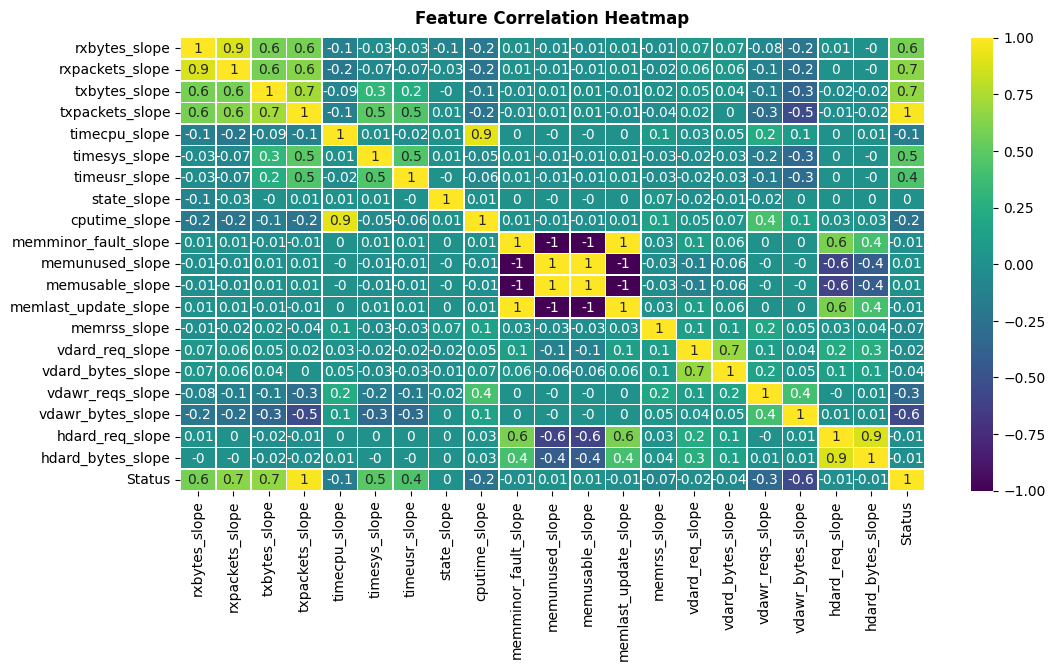

In [ ]:
plt.figure(figsize=(12,6), dpi =100)
sns.heatmap(round(df.corr(), 2), linewidth=0.5,annot=True,fmt='.1g', cmap="viridis")
plt.title("Feature Correlation Heatmap", fontsize = 12, pad =10, fontweight='bold')

**Define features & Target**

In [ ]:
X = df.drop(['Status'], axis=1)

In [ ]:
y = df['Status']


**Feature Scaling for Clustering**

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

**Split Data to Train Test**

In [ ]:
#train test split
X_train1, X_test1,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1)

**Scaling Train and test Features for Classification Modeling**

In [ ]:
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)
X_train = pd.DataFrame(data=X_train, columns=df.columns[:-1])
X_test = pd.DataFrame(data=X_test, columns=df.columns[:-1])

In [ ]:
X_train

,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,memunused_slope,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope
0,-0.642474,-0.518648,-0.774071,-0.606132,-0.758062,-0.301377,-0.247796,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-0.586839,0.355837,-0.023581,-0.027298
1,-0.279497,-0.357642,-0.774071,-0.606132,-0.758062,-0.294466,-0.248847,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,2.579416,-0.116919,-0.167849,1.073956,0.356930,-0.023581,-0.027298
2,-0.544365,-0.475514,-0.774071,-0.606132,0.208241,-0.282315,-0.227750,-0.001314,1.213794,-0.012204,0.012204,0.012204,-0.012204,-0.424217,-0.116919,-0.167849,0.408925,0.356807,-0.023581,-0.027298
3,-0.544365,-0.475514,-0.774071,-0.606132,1.765076,-0.301377,-0.248335,-0.001314,1.213794,-0.012204,0.012204,0.012204,-0.012204,-0.194088,-0.116919,-0.167849,-0.356712,0.356266,-0.023581,-0.027298
4,-0.348148,-0.393811,-0.774071,-0.606132,-0.758062,-0.301377,-0.238042,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-1.074315,0.342380,-0.023581,-0.027298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6710,2.008710,1.876273,-0.774071,-0.606132,0.499325,-0.290786,-0.240898,-0.001314,1.213794,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-0.839188,0.356185,-0.023581,-0.027298
6711,2.166483,2.682840,1.407888,1.678077,-0.758062,-0.301377,-0.243862,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-1.143189,-2.807534,-0.023581,-0.027298
6712,-0.335166,-0.388060,-0.774071,-0.606132,-0.758062,-0.288615,-0.230687,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-0.777944,0.355165,-0.023581,-0.027298
6713,-0.544365,-0.475514,-0.774071,-0.606132,0.401608,-0.296612,-0.238042,-0.001314,1.213794,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,0.986519,0.356913,-0.023581,-0.027298


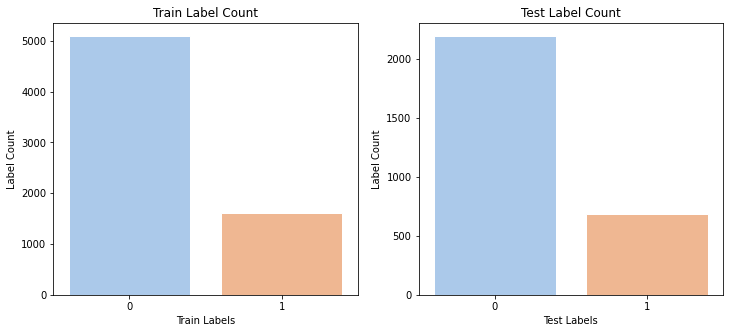

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', y_train), ('Test', y_test)]):
    data = group[1].value_counts()
    sns.set_theme(style="whitegrid")
    sns.barplot(ax=ax[idx], x=data.index, y=data.values,palette="pastel")
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()

**Random Oversampling**

In [ ]:
count_class_0,count_class_1=forensics.Status.value_counts()
df_class_0=forensics[forensics['Status']==0]
df_class_1=forensics[forensics['Status']==1]
df_class_0

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,...,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,79.8981,5.5275,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,24.3045,89.9850,0.0,0.0,0
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0000,0.0000,73.8278,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,5.9061,89.8986,0.0,0.0,0
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,32.8285,89.9897,0.0,0.0,0
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,4.2364,89.8741,0.0,0.0,0
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,22.7510,89.9864,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,1604486612,3,"""fca7204b-7141-4055-82b7-b793b4694d70""",one-33,88.3681,29.5388,0.0000,0.0000,44.0290,0.1146,...,0.0,0.0,89.1608,0.0000,0.0000,29.5388,89.9880,0.0,0.0,0
7297,1604486582,3,"""fca7204b-7141-4055-82b7-b793b4694d70""",one-33,87.7974,26.5651,0.0000,0.0000,44.0290,0.0573,...,0.0,0.0,0.0000,0.0000,0.0000,21.8014,89.9767,0.0,0.0,0
7298,1604486552,3,"""fca7204b-7141-4055-82b7-b793b4694d70""",one-33,87.7974,26.5651,0.0000,0.0000,41.9872,0.5920,...,0.0,0.0,89.7913,0.0000,0.0000,20.1363,89.9865,0.0,0.0,0
7299,1604486522,3,"""fca7204b-7141-4055-82b7-b793b4694d70""",one-33,88.0546,29.2488,0.0000,0.0000,45.0000,0.1146,...,0.0,0.0,0.0000,0.0000,0.0000,21.8014,89.9781,0.0,0.0,0


In [ ]:
df_class_1_over=df_class_1.sample(count_class_0, replace=True)
df_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [ ]:
print("Random Over Sampling: ")
print(df_over.Status.value_counts())

Random Over Sampling: 
0    7288
1    7288
Name: Status, dtype: int64


In [ ]:
colors =['#069AF3','#FF4500','#3f88c5','#ffba08','#d00000']
fig = go.Figure(go.Pie(labels=['Normal','Attack'],values=df_over.Status.value_counts(),name='Attack'))
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16,marker={'colors':colors})
fig.update_layout(height=400, width=400, title_text='<b style="color:#000000;">Percentage of Target Variable</b>')
fig.show()

In [ ]:
df_over=df_over.drop(['LAST_POLL', 'VMID', 'UUID','dom'], axis=1)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

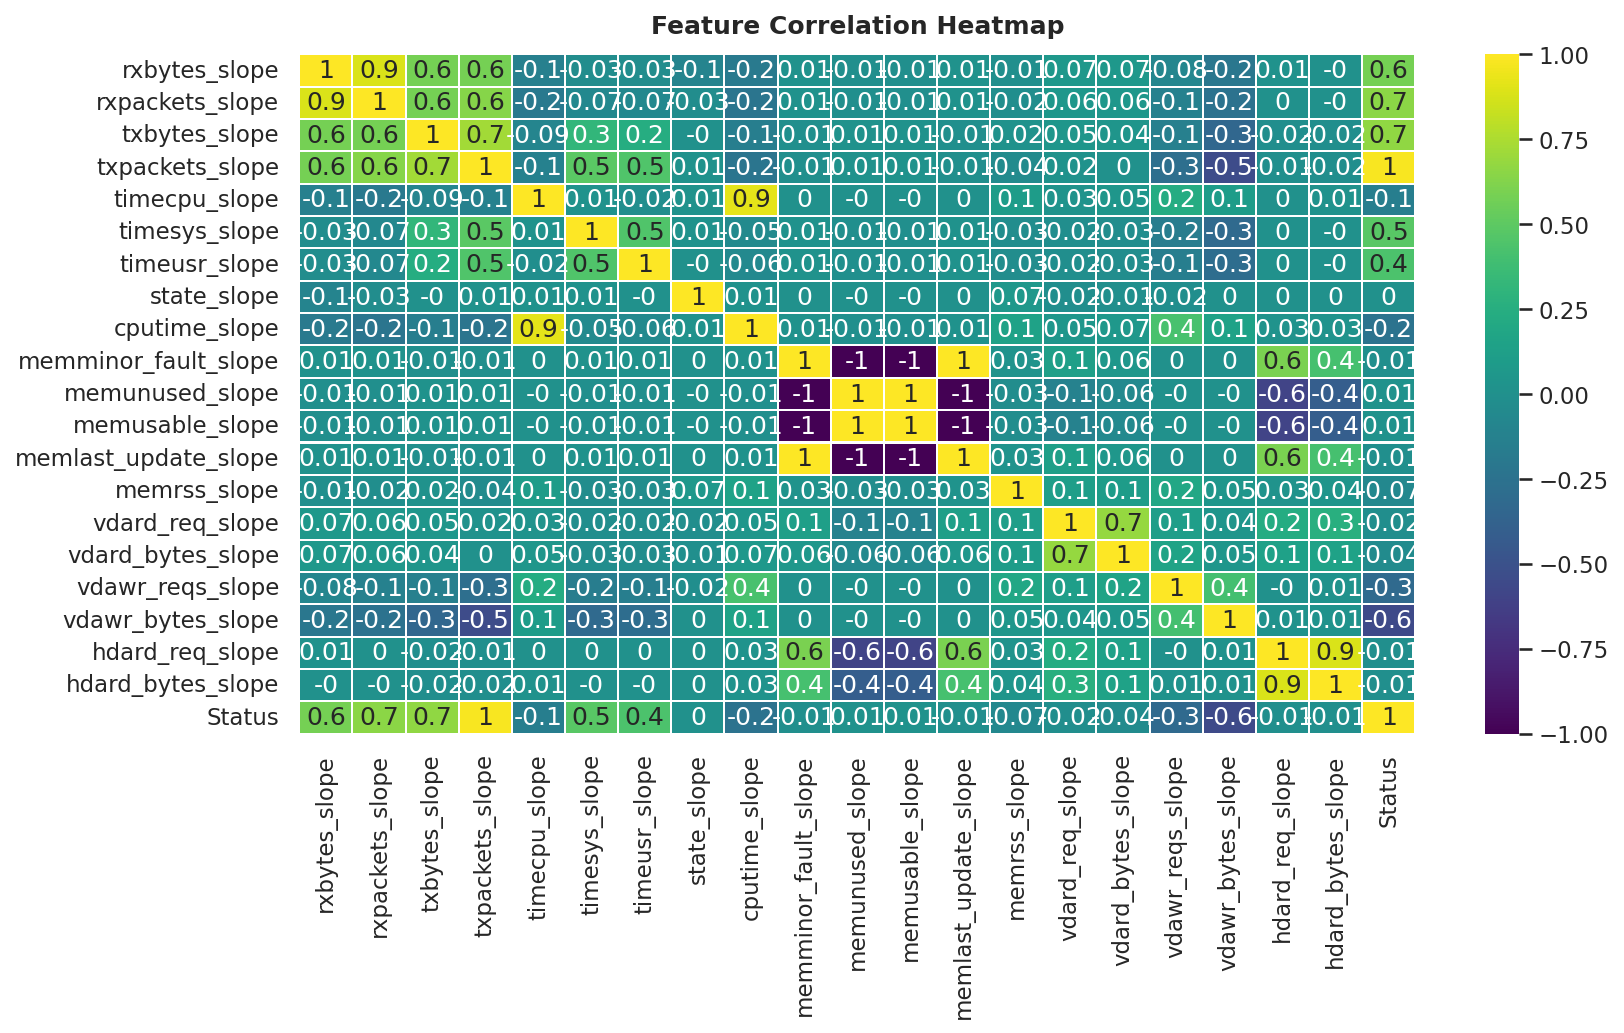

In [ ]:
plt.figure(figsize=(12,6), dpi = 150)
sns.heatmap(round(df.corr(), 2), linewidth=0.5,annot=True,fmt='.1g', cmap="viridis")
plt.title("Feature Correlation Heatmap", fontsize = 12, pad =10, fontweight='bold')

**Splitting Oversampled Data into Test and Train**

In [ ]:

X_oversampled = df_over.drop(['Status'], axis=1)


In [ ]:
y_oversampled = df_over['Status']


In [ ]:
#train test split
X_train_over1, X_test_over1,y_train_over, y_test_over = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state =1)

In [ ]:
X_train_over = scaler.fit_transform(X_train_over1)
X_test_over = scaler.transform(X_test_over1)
X_train_over = pd.DataFrame(data=X_train_over, columns=df.columns[:-1])
X_test_over = pd.DataFrame(data=X_test_over, columns=df.columns[:-1])

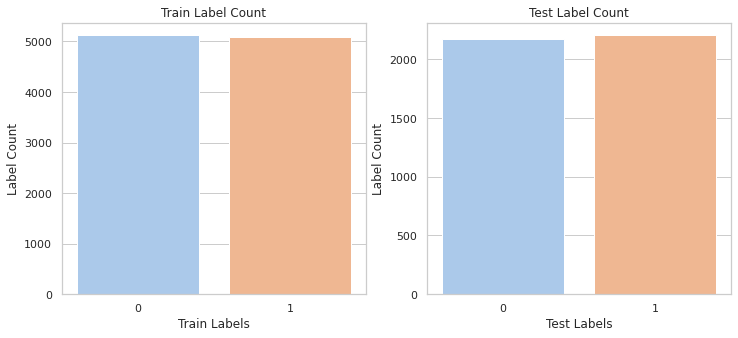

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', y_train_over), ('Test', y_test_over)]):
    data = group[1].value_counts()
    sns.set_theme(style="whitegrid")
    sns.barplot(ax=ax[idx], x=data.index, y=data.values,palette="pastel")
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()

In [ ]:
# K-means for EDA 

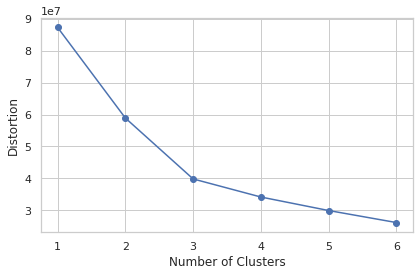

In [ ]:
# Elbow method to find the optimal value of K
distortions = []
for i in range(1,7):
    km = KMeans(n_clusters=i,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    km.fit_predict(X)
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions, marker ='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
km = KMeans(n_clusters=2,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=1)
y_km = km.fit_predict(scaled_X)

In [ ]:
y_km

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
homogeneity_score(y, y_km)

0.8661393463406997

In [ ]:
kmeans = km.fit(scaled_X)
centers = np.array(kmeans.cluster_centers_)
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(scaled_X)
label = km.fit_predict(scaled_X)

plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(X_embedded[label == i , 0] , X_embedded[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()


KeyboardInterrupt: ignored

**Support Vector Machine before balancing**

In [ ]:
#Support Vector Machine before balancing
svc = SVC(class_weight='balanced')

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1, 10, 100, 1000],'gamma':['scale','auto'], 'kernel': ['linear','rbf']}
grid = GridSearchCV(svc,param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
svm = SVC(C=100, gamma= 'scale', kernel = 'linear')

In [ ]:
svm.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [ ]:
dump(svm, 'svm.joblib')
loaded_svm = load('svm.joblib')

In [ ]:
y_pred_svm = loaded_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2191
           1       1.00      1.00      1.00       688

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



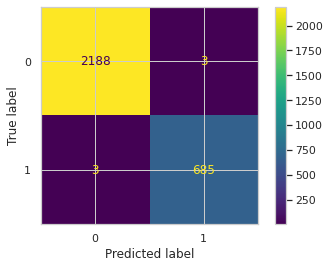

In [ ]:
plot_confusion_matrix(loaded_svm,X_test,y_test)

In [ ]:
!pip install scikit-plot


In [ ]:
import scikitplot as skplt

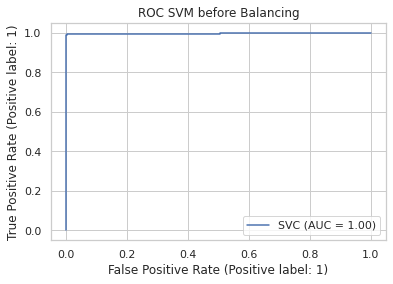

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(loaded_svm, X_test, y_test)
plt.title('ROC SVM before Balancing')
plt.show()

In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_svm))
print('Precision : %3f' % precision_score(y_test, y_pred_svm))
print('Recall : %3f' % recall_score(y_test, y_pred_svm))
print('F1 : %3f' % f1_score(y_test, y_pred_svm))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_svm))

Accuracy : 0.997916
Precision : 0.995640
Recall : 0.995640
F1 : 0.995640
kappa_statistic : 0.994270


In [ ]:
#Support Vector Machine with Balancing
svc_over= SVC()

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc_over,param_grid)

In [ ]:
grid.fit(X_train_over,y_train_over)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 'scale'}

In [ ]:
svm_over = SVC(C=1, gamma = 'scale')

In [ ]:
svm_over.fit(X_train_over,y_train_over)

SVC(C=1)

In [ ]:
dump(svm_over, 'svm_over.joblib')
loaded_svm_over = load('svm_over.joblib')

In [ ]:
y_pred_svm_over = loaded_svm_over.predict(X_test_over)

In [ ]:
print(classification_report(y_test_over,y_pred_svm_over))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2172
           1       1.00      1.00      1.00      2201

    accuracy                           1.00      4373
   macro avg       1.00      1.00      1.00      4373
weighted avg       1.00      1.00      1.00      4373



In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_over, y_pred_svm_over))
print('Precision : %3f' % precision_score(y_test_over, y_pred_svm_over))
print('Recall : %3f' % recall_score(y_test_over, y_pred_svm_over))
print('F1 : %3f' % f1_score(y_test_over, y_pred_svm_over))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, y_pred_svm_over))

Accuracy : 0.998171
Precision : 0.997730
Recall : 0.998637
F1 : 0.998183
kappa_statistic : 0.996341


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'SVM Over Sampled')

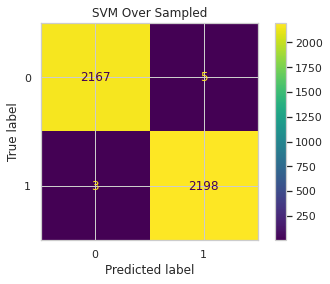

In [ ]:
plot_confusion_matrix(loaded_svm_over, X_test_over,y_test_over)
plt.title('SVM Over Sampled')

# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
# Maximum number of levels in tree
max_depth = [2,3,4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(param_grid)

{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


KeyboardInterrupt: ignored

In [ ]:
rf_Grid.best_params_

In [ ]:
forest = RandomForestClassifier(max_depth=4, min_samples_leaf= 1, n_estimators= 391, random_state=1)

forest.fit(X_train,y_train)
importances = forest.feature_importances_
pd.DataFrame({"feature": X.columns, "importances": importances}).sort_values("importances", ascending=False).reset_index(drop=True)

In [ ]:
#Selected Features
X_sf= df_over[['txpackets_slope', 'txbytes_slope', 'rxbytes_slope', 'rxpackets_slope', 'vdawr_reqs_slope',
           'vdawr_bytes_slope','timesys_slope', 'timeusr_slope',  'timecpu_slope', 
          'cputime_slope', 'memrss_slope']]

In [ ]:
X_train2, X_test2,y_train_sf, y_test_sf = train_test_split(X_sf, y_oversampled, test_size=0.3, random_state =1)

In [ ]:
X_train_sf = scaler.fit_transform(X_train2)
X_test_sf = scaler.transform(X_test2)

# SVM with Selected Features

In [ ]:
svc = SVC()

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1, 10, 100, 1000],'gamma':['scale','auto'],
             'kernel': ['linear','rbf']}
grid = GridSearchCV(svc,param_grid)

In [ ]:
grid.fit(X_train_sf,y_train_sf)

In [ ]:
grid.best_params_

In [ ]:
svm_sf = SVC(C=100, gamma= 'scale', kernel = 'rbf')

In [ ]:
svm_sf.fit(X_train_sf, y_train_sf)

In [ ]:
dump(svm_sf, 'svm_sf.joblib')
loaded_svm_sf = load('svm_sf.joblib')

In [ ]:
y_pred_svm_sf = loaded_svm_sf.predict(X_test_sf)

In [ ]:
print(classification_report(y_test_sf, y_pred_svm_sf))

In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_sf, y_pred_svm_sf))
print('Precision : %3f' % precision_score(y_test_sf, y_pred_svm_sf))
print('Recall : %3f' % recall_score(y_test_sf, y_pred_svm_sf))
print('F1 : %3f' % f1_score(y_test_sf, y_pred_svm_sf))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_sf, y_pred_svm_sf))

In [ ]:
plot_confusion_matrix(loaded_svm_sf,X_test_sf,y_test_sf)

# Naive Bayes before Balancing

In [ ]:
#Naive Bayes without Balancing
bnb=BernoulliNB(class_prior=[0.74,0.26], alpha=1 )
bnb.fit(X_train, y_train)

In [ ]:
dump(bnb, 'bnb.joblib')
loaded_nb_model = load('bnb.joblib')

In [ ]:
y_pred_nb = loaded_nb_model.predict(X_test)

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred_nb))

In [ ]:
plot_confusion_matrix(loaded_nb_model,X_test,y_test)
plt.show()

In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_nb))
print('Precision : %3f' % precision_score(y_test, y_pred_nb))
print('Recall : %3f' % recall_score(y_test, y_pred_nb))
print('F1 : %3f' % f1_score(y_test, y_pred_nb))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_nb))

In [ ]:
skplt.metrics.plot_roc(y_test, loaded_nb_model.predict_proba(X_test), plot_micro=False)
plt.title('ROC Naive bayes Before Balancing')
plt.show()

# Naive Bayes after Balancing

In [ ]:

bnb_over=BernoulliNB(class_prior=[0.5,0.5], alpha=1 )
bnb_over.fit(X_train_over, y_train_over)

In [ ]:
dump(bnb_over, 'bnb_over.joblib')
loaded_nb_over_model = load('bnb_over.joblib')

In [ ]:
y_pred_nb_over = loaded_nb_over_model.predict(X_test_over)

In [ ]:
print('Classification Report')
print(classification_report(y_test_over, y_pred_nb_over))

In [ ]:
plot_confusion_matrix(loaded_nb_over_model,X_test_over,y_test_over)
plt.show()

In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_over, y_pred_nb_over))
print('Precision : %3f' % precision_score(y_test_over, y_pred_nb_over))
print('Recall : %3f' % recall_score(y_test_over, y_pred_nb_over))
print('F1 : %3f' % f1_score(y_test_over, y_pred_nb_over))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, y_pred_nb_over))

In [ ]:
skplt.metrics.plot_roc(y_test_over, loaded_nb_over_model.predict_proba(X_test_over), plot_micro=False)
plt.title('ROC Naive Bayes Over Sampled')
plt.show()

# Naive Bayes with Selected Features

In [ ]:
#Naive Bayes with selected Features
bnb_sf=BernoulliNB(class_prior=[0.5,0.5], alpha=1 )
bnb_sf.fit(X_train_sf, y_train_sf)

In [ ]:
dump(bnb_sf, 'bnb_sf.joblib')
loaded_nb_model = load('bnb_sf.joblib')

In [ ]:
y_pred_nb_sf = loaded_nb_model.predict(X_test_sf)

In [ ]:
print('Classification Report')
print(classification_report(y_test_sf, y_pred_nb_sf))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2172
           1       1.00      0.99      0.99      2201

    accuracy                           0.99      4373
   macro avg       0.99      0.99      0.99      4373
weighted avg       0.99      0.99      0.99      4373



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



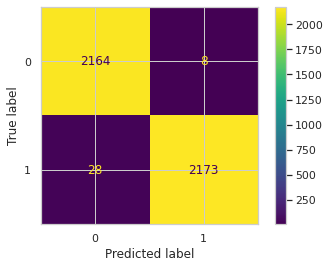

In [ ]:
plot_confusion_matrix(loaded_nb_model,X_test_sf,y_test_sf)


In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_sf, y_pred_nb_sf))
print('Precision : %3f' % precision_score(y_test_sf, y_pred_nb_sf))
print('Recall : %3f' % recall_score(y_test_sf, y_pred_nb_sf))
print('F1 : %3f' % f1_score(y_test_sf, y_pred_nb_sf))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_sf, y_pred_nb_sf))

Accuracy : 0.991768
Precision : 0.996332
Recall : 0.987279
F1 : 0.991785
kappa_statistic : 0.983536


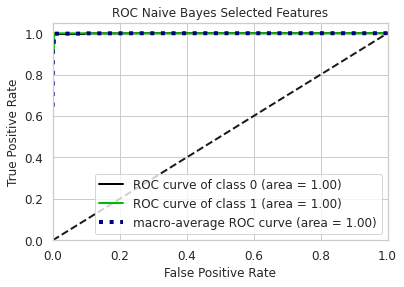

In [ ]:
skplt.metrics.plot_roc(y_test_sf, loaded_nb_model.predict_proba(X_test_sf), plot_micro=False)
plt.title('ROC Naive Bayes Selected Features')
plt.show()

In [ ]:
#Deepali

 **Decision Tree on Raw Data- Gini Impurity**

In [ ]:
!pip install joblib

In [ ]:
#Decision Tree Model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import joblib

dtmodeldump = DecisionTreeClassifier().fit(X_train,y_train)
joblib.dump(dtmodeldump, 'dtmodeldump.joblib')
dtmodel = joblib.load('dtmodeldump.joblib')
y_pred_dt = dtmodel.predict(X_test)

RUN HERE

In [ ]:
dtmodel = joblib.load('dtmodeldump.joblib')
y_pred_dt = dtmodel.predict(X_test)

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(dtmodel, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test") 
dot_data = tree.export_graphviz(dtmodel, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

AttributeError: ignored

In [ ]:
accuracy = accuracy_score(y_test,y_pred_dt)
c_report = classification_report(y_pred_dt, y_test)
c_matrix = confusion_matrix(y_test, y_pred_dt)

In [ ]:
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9989579715178881
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2194
           1       1.00      1.00      1.00       685

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Confusion matrix:
[[2191    0]
 [   3  685]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



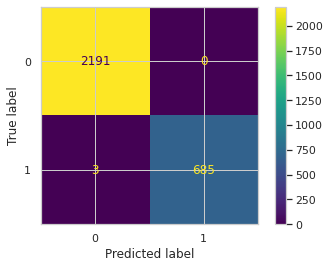

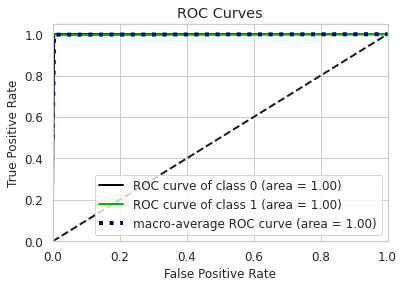

In [ ]:
plot_confusion_matrix(dtmodel,X_test,y_test)
skplt.metrics.plot_roc(y_test, dtmodel.predict_proba(X_test), plot_micro=False)
plt.show()

**Pruning the Decison Tree**

In [ ]:
path = dtmodel.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 9.92606404e-05 7.90962601e-03 3.57581989e-01]


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

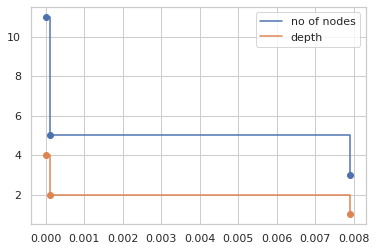

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

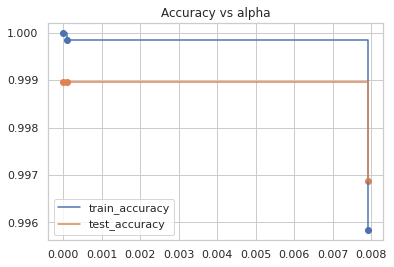

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
clf_dump = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.010)
clf_dump.fit(X_train,y_train)
joblib.dump(clf_dump,'clf_dump.joblib')



['clf_dump.joblib']

RUN HERE

In [ ]:
clf_=joblib.load('clf_dump.joblib')
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

accuracy = accuracy_score(y_test,y_test_pred)
c_report = classification_report(y_test_pred,y_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Train score 0.9958302308265078
Test score 0.9968739145536645
Classification report:
Accuracy:  0.9968739145536645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2188
           1       1.00      0.99      0.99       691

    accuracy                           1.00      2879
   macro avg       1.00      0.99      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Confusion matrix:
[[2185    6]
 [   3  685]]


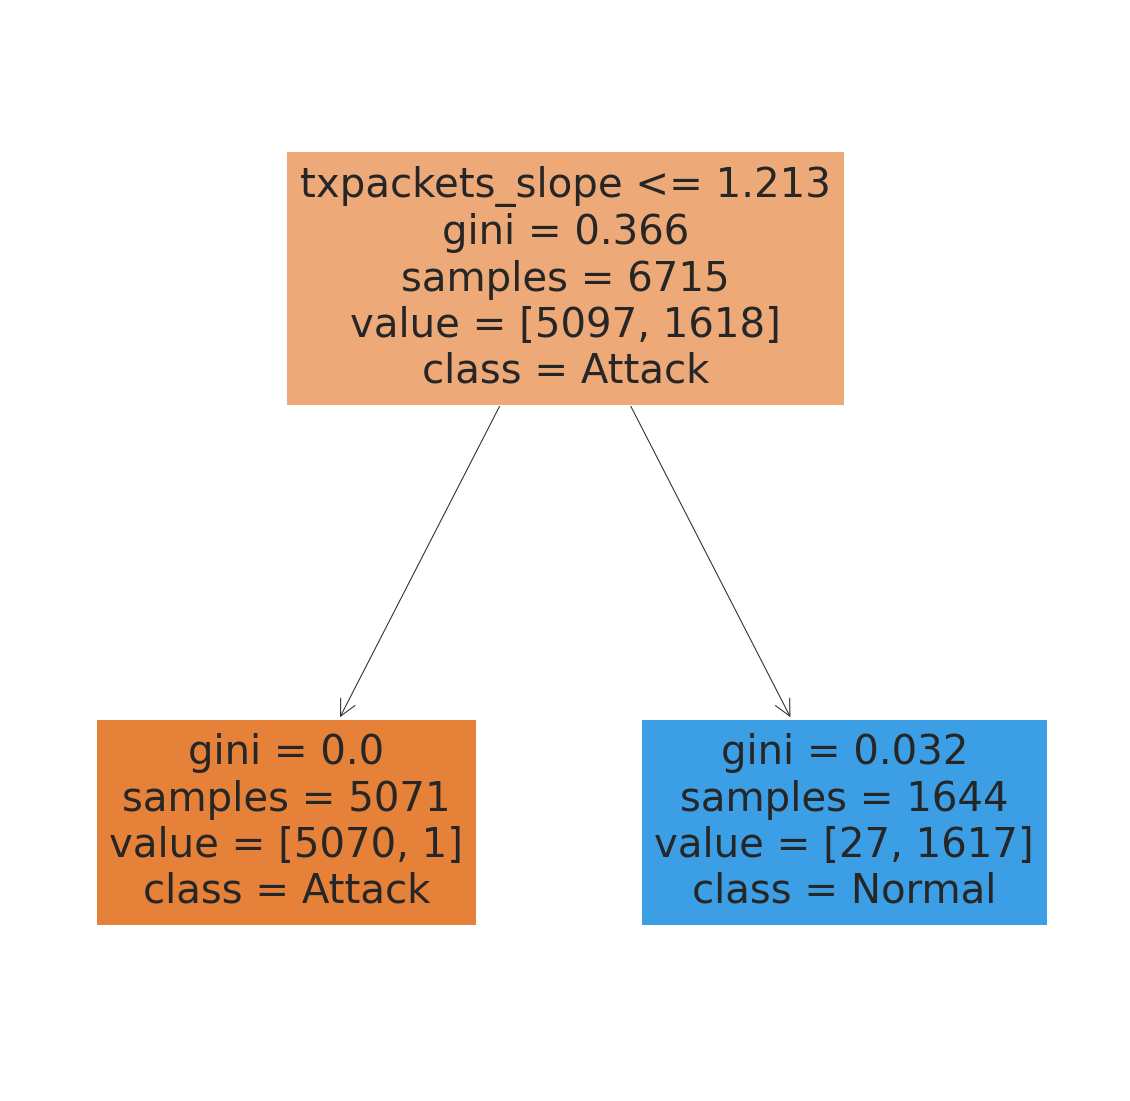

In [ ]:
plt.figure(figsize=(20,20))
features = X_train.columns
classes = ['Attack','Normal']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

**Decion Tree on Raw Data- Entropy & Information Gain**

In [ ]:
#DTree using entropy and information gain
dtmodel_entropydump = DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)
joblib.dump(dtmodel_entropydump,'dtmodel_entropydump.joblib')



['dtmodel_entropydump.joblib']

RUN HERE

In [ ]:
dtmodel_entropy=joblib.load('dtmodel_entropydump.joblib')
y_pred_dt_entropy = dtmodel_entropy.predict(X_test)
y_pred_dt_entropy = dtmodel_entropy.predict(X_test)

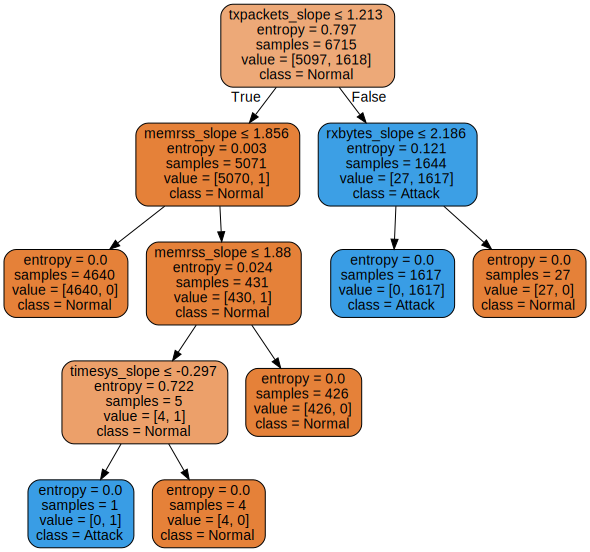

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(dtmodel_entropy, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test") 
dot_data = tree.export_graphviz(dtmodel_entropy, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
accuracy = accuracy_score(y_test,y_pred_dt_entropy)
c_report = classification_report(y_pred_dt_entropy, y_test)
c_matrix = confusion_matrix(y_test, y_pred_dt_entropy)

In [ ]:
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9989579715178881
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2194
           1       1.00      1.00      1.00       685

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Confusion matrix:
[[2191    0]
 [   3  685]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



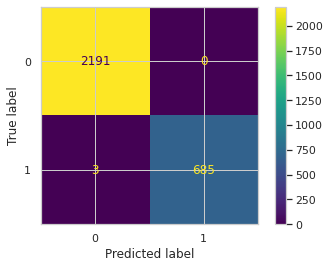

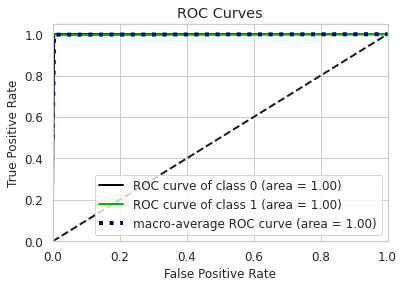

In [ ]:
plot_confusion_matrix(dtmodel_entropy,X_test,y_test)
skplt.metrics.plot_roc(y_test, dtmodel_entropy.predict_proba(X_test), plot_micro=False)
plt.show()

**Grid Search on Decision Tree-Gini Index**

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cvdump = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cvdump.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cvdump.best_estimator_
joblib.dump(grid_search_cvdump,'grid_search_cvdump.joblib')

['grid_search_cvdump.joblib']

RUN HERE

In [ ]:
grid_search_cv=joblib.load('grid_search_cvdump.joblib')

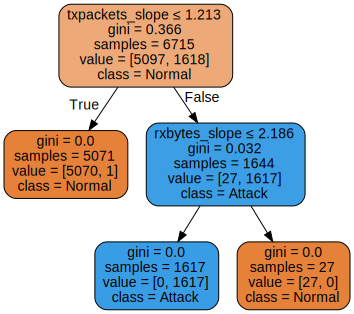

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(grid_search_cv.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test") 
dot_data = tree.export_graphviz(grid_search_cv.best_estimator_, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred_gini = grid_search_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_gini)
c_report = classification_report(y_pred_gini, y_test)
c_matrix = confusion_matrix(y_test, y_pred_gini)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(grid_search_cv,X_test,y_test)

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv_entropydump = GridSearchCV(DecisionTreeClassifier(criterion="entropy",random_state=42), params, verbose=1, cv=3)
grid_search_cv_entropydump.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

**Grid Search On Decision Tree-Entropy**

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv_entropydump = GridSearchCV(DecisionTreeClassifier(criterion="entropy",random_state=42), params, verbose=1, cv=3)
grid_search_cv_entropydump.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv_entropydump.best_estimator_
joblib.dump(grid_search_cv_entropydump,'grid_search_cv_entropydump.joblib')

['grid_search_cv_entropydump.joblib']

RUN HERE

In [ ]:
grid_search_cv_entropy=joblib.load('grid_search_cv_entropydump.joblib')

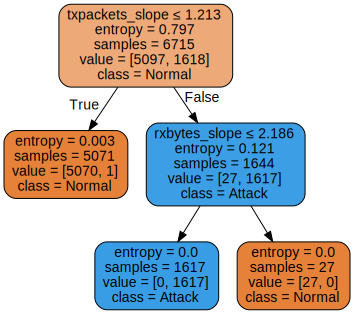

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(grid_search_cv_entropy.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test") 
dot_data = tree.export_graphviz(grid_search_cv_entropy.best_estimator_, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Classification report:
Accuracy:  0.9989579715178881
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2194
           1       1.00      1.00      1.00       685

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Confusion matrix:
[[2191    0]
 [   3  685]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



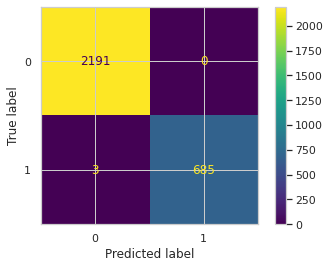

In [ ]:
y_pred_entropy = grid_search_cv_entropy.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_entropy)
c_report = classification_report(y_pred_entropy, y_test)
c_matrix = confusion_matrix(y_test, y_pred_entropy)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(grid_search_cv_entropy,X_test,y_test)

KeyboardInterrupt: ignored

**Decision Tree on Oversampled Data- Gini Impurity**

In [ ]:
#Decision Tree on Oversampled Data

dtmodel_overdump = DecisionTreeClassifier().fit(X_train_over,y_train_over)
joblib.dump(dtmodel_overdump,'dtmodel_overdump.joblib')



NameError: ignored

RUN HERE

In [ ]:
dtmodel_over=joblib.load('dtmodel_overdump.joblib')
y_pred_over_dt = dtmodel.predict(X_test_over)

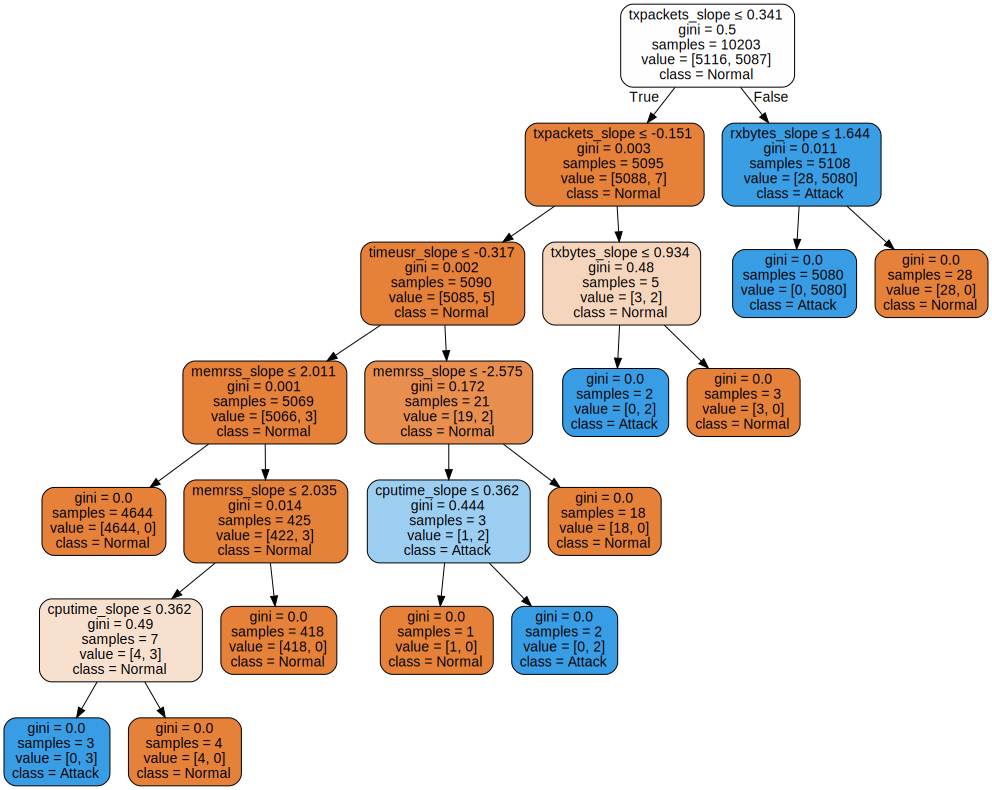

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(dtmodel_over, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test_over") 
dot_data = tree.export_graphviz(dtmodel_over, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:

accuracy = accuracy_score(y_test_over,y_pred_over_dt)
c_report = classification_report(y_pred_over_dt, y_test_over)
c_matrix = confusion_matrix(y_test_over, y_pred_over_dt)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.49668419849073864
              precision    recall  f1-score   support

           0       1.00      0.50      0.66      4373
           1       0.00      0.00      0.00         0

    accuracy                           0.50      4373
   macro avg       0.50      0.25      0.33      4373
weighted avg       1.00      0.50      0.66      4373

Confusion matrix:
[[2172    0]
 [2201    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



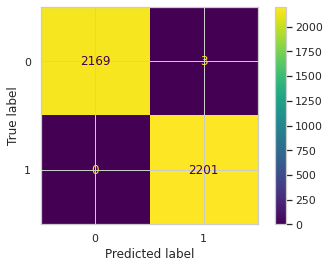

In [ ]:
plot_confusion_matrix(dtmodel_over,X_test_over,y_test_over)


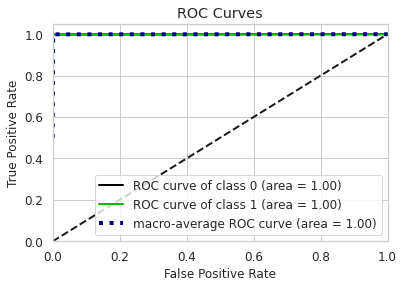

In [ ]:
skplt.metrics.plot_roc(y_test_over, dtmodel_over.predict_proba(X_test_over), plot_micro=False)
plt.show()

**Pruned Decision Tree**

In [ ]:
path = dtmodel_over.cost_complexity_pruning_path(X_train_over, y_train_over)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 1.30680519e-04 1.69692120e-04 1.95559573e-04
 5.45849559e-03 4.93167205e-01]


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_over, y_train_over)
    clfs.append(clf)

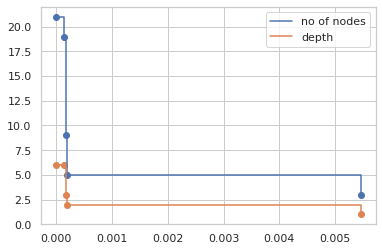

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

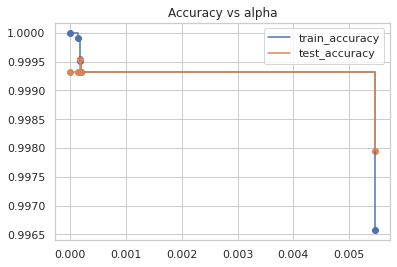

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train_over)
    y_test_pred = c.predict(X_test_over)
    train_acc.append(accuracy_score(y_train_pred,y_train_over))
    test_acc.append(accuracy_score(y_test_pred,y_test_over))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
clf_2dump = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0010)
clf_2dump.fit(X_train_over,y_train_over)
joblib.dump(clf_2dump,'clf_2dump.joblib')


['clf_2dump.joblib']

In [ ]:
clf_=joblib.load('clf_2dump.joblib')
y_train_pred = clf_.predict(X_train_over)
y_test_pred = clf_.predict(X_test_over)

print(f'Train score {accuracy_score(y_train_pred,y_train_over)}')
print(f'Test score {accuracy_score(y_test_pred,y_test_over)}')
accuracy = accuracy_score(y_test_over,y_test_pred)
c_report = classification_report(y_test_pred,y_test_over)
c_matrix = confusion_matrix(y_test_over, y_test_pred)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Train score 0.9993139272762913
Test score 0.9993139721015322
Classification report:
Accuracy:  0.9993139721015322
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2173
           1       1.00      1.00      1.00      2200

    accuracy                           1.00      4373
   macro avg       1.00      1.00      1.00      4373
weighted avg       1.00      1.00      1.00      4373

Confusion matrix:
[[2171    1]
 [   2 2199]]


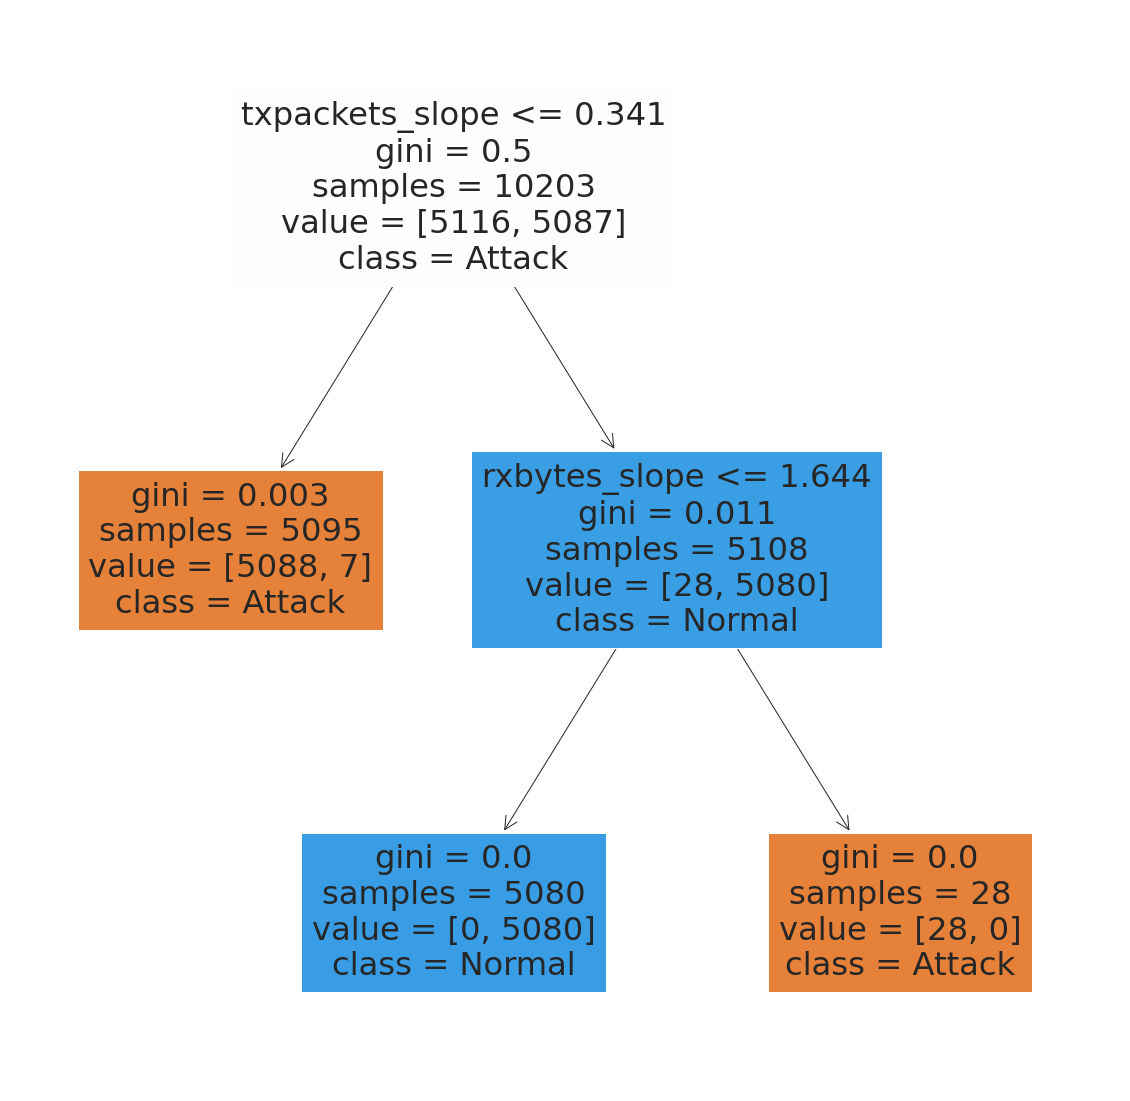

In [ ]:
plt.figure(figsize=(20,20))
features = X_oversampled.columns
classes = ['Attack','Normal']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

**Decision Tree on Oversampled Data- Entropy & Information Gain**

In [ ]:
 dtmodel_over_entropydump = DecisionTreeClassifier(criterion="entropy").fit(X_train_over,y_train_over)
 joblib.dump(dtmodel_over_entropydump,'dtmodel_over_entropydump.joblib')
 

NameError: ignored

RUN HERE

In [ ]:
dtmodel_over_entropy=joblib.load('dtmodel_over_entropydump.joblib')
y_pred_over_dt_entropy = dtmodel.predict(X_test_over)

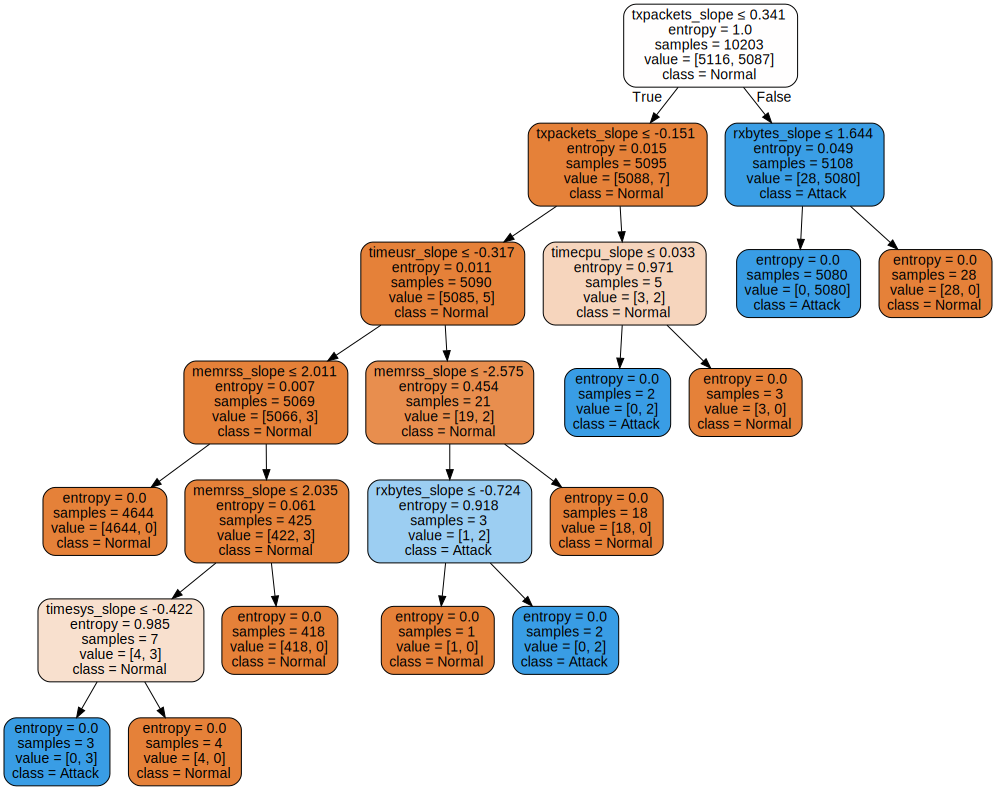

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(dtmodel_over_entropy, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test_over") 
dot_data = tree.export_graphviz(dtmodel_over_entropy, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: Conf

Classification report:
Accuracy:  0.49668419849073864
              precision    recall  f1-score   support

           0       1.00      0.50      0.66      4373
           1       0.00      0.00      0.00         0

    accuracy                           0.50      4373
   macro avg       0.50      0.25      0.33      4373
weighted avg       1.00      0.50      0.66      4373

Confusion matrix:
[[2172    0]
 [2201    0]]


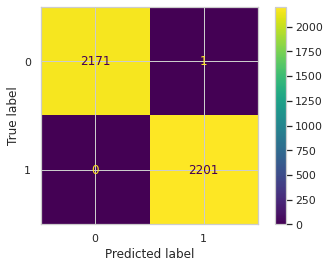

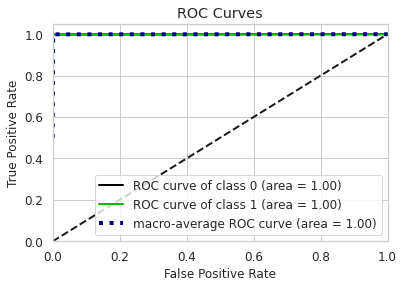

In [ ]:
accuracyen = accuracy_score(y_test_over,y_pred_over_dt_entropy)
c_reporten = classification_report(y_pred_over_dt_entropy, y_test_over)
c_matrixen = confusion_matrix(y_test_over, y_pred_over_dt_entropy)
print("Classification report:")
print("Accuracy: ", accuracyen)
print(c_reporten)
print("Confusion matrix:")
print(c_matrixen)
plot_confusion_matrix(dtmodel_over_entropy,X_test_over,y_test_over)
skplt.metrics.plot_roc(y_test_over, dtmodel_over.predict_proba(X_test_over), plot_micro=False)
plt.show()

**Grid Search on Oversampled Decision Tree-Gini Impurity**

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv_overdump = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv_overdump.fit(X_train_over, y_train_over)

NameError: ignored

In [ ]:
grid_search_cv_overdump.best_estimator_
joblib.dump(grid_search_cv_overdump.best_estimator_,'grid_search_cv_overdump.best_estimator_.joblib')

['grid_search_cv_overdump.best_estimator_.joblib']

RUN HERE

In [ ]:
grid_search_cv_over_best_estimator_=joblib.load('grid_search_cv_overdump.best_estimator_.joblib')

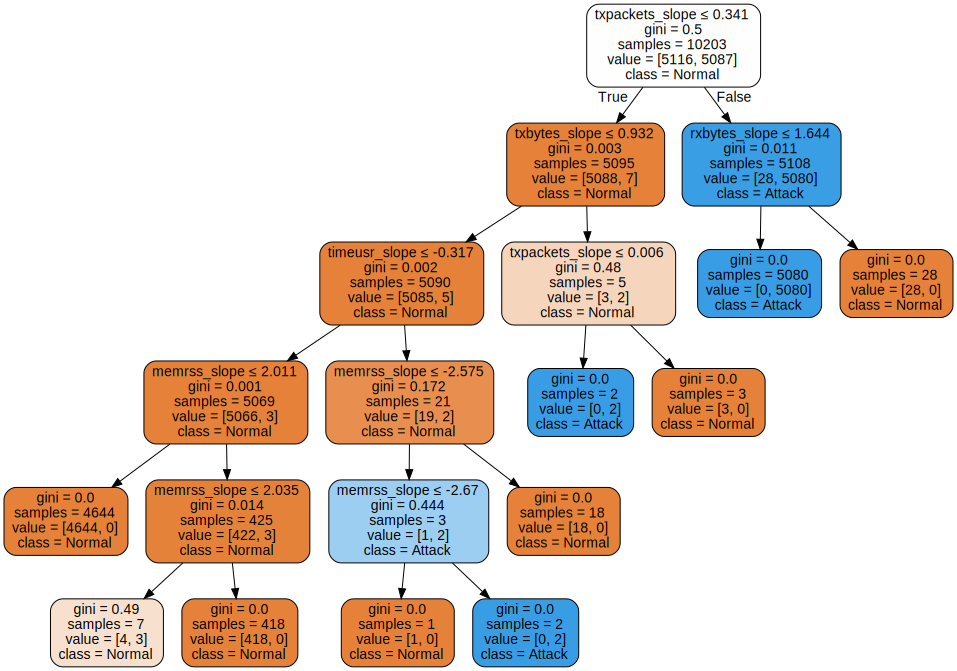

In [ ]:

names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(grid_search_cv_over_best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test_over") 
dot_data = tree.export_graphviz(grid_search_cv_over_best_estimator_, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred_over = grid_search_cv_over_best_estimator_.predict(X_test_over)
accuracy = accuracy_score(y_test_over,y_pred_over)
c_report = classification_report(y_pred_over, y_test_over)
c_matrix = confusion_matrix(y_test_over, y_pred_over)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(grid_search_cv_over_best_estimator_,X_test_over,y_test_over)

NameError: ignored

In [ ]:
skplt.metrics.plot_roc(y_test_over, dtmodel_over.predict_proba(X_test_over), plot_micro=False)
plt.show()

NameError: ignored

**Grid Search On oversampled Decision tree-Entropy**

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv_over_entropydump = GridSearchCV(DecisionTreeClassifier(criterion="entropy",random_state=42), params, verbose=1, cv=3)
grid_search_cv_over_entropydump.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv_over_entropydump.best_estimator_
joblib.dump(grid_search_cv_over_entropydump.best_estimator_,'grid_search_cv_over_entropydump.best_estimator_.joblib')

['grid_search_cv_over_entropydump.best_estimator_.joblib']

RUN HERE

In [ ]:
grid_search_cv_over_entropy_best_estimator_=joblib.load('grid_search_cv_over_entropydump.best_estimator_.joblib')

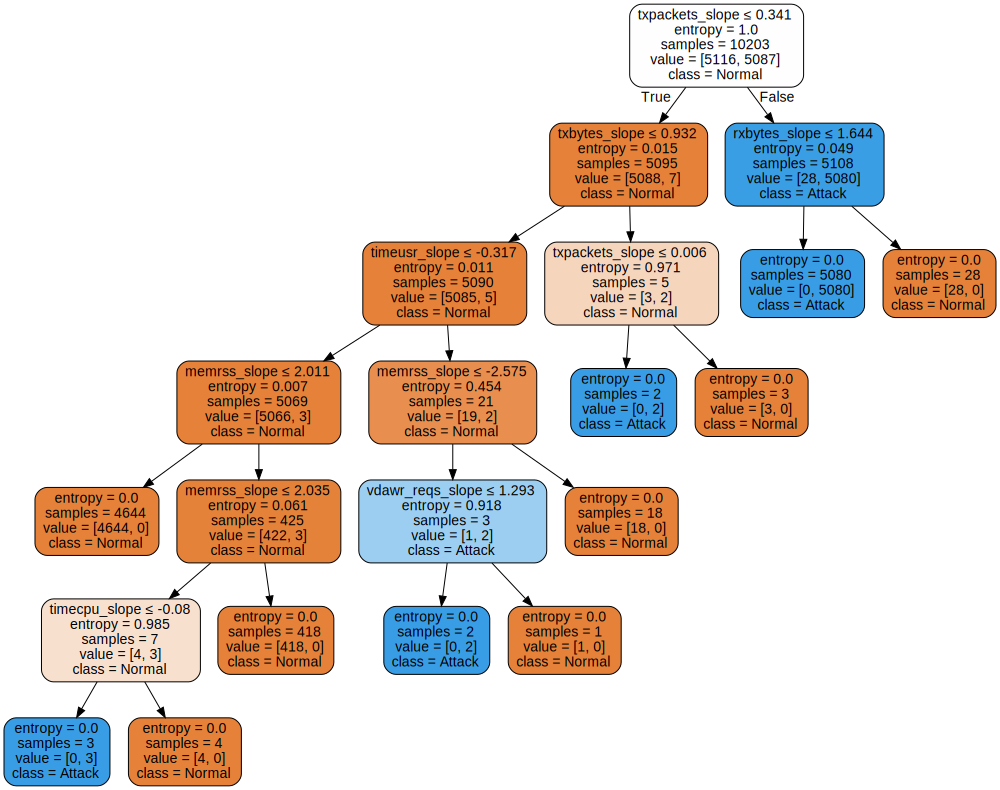

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(grid_search_cv_over_entropy_best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test_over") 
dot_data = tree.export_graphviz(grid_search_cv_over_entropy_best_estimator_, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Classification report:
Accuracy:  0.9995426480676881
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2170
           1       1.00      1.00      1.00      2203

    accuracy                           1.00      4373
   macro avg       1.00      1.00      1.00      4373
weighted avg       1.00      1.00      1.00      4373

Confusion matrix:
[[2170    2]
 [   0 2201]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



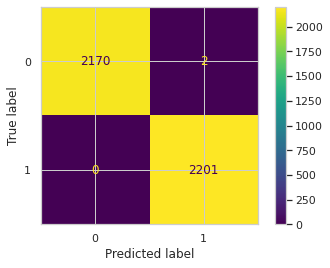

In [ ]:
y_pred_entropyover = grid_search_cv_over_entropy_best_estimator_.predict(X_test_over)
accuracy = accuracy_score(y_test_over,y_pred_entropyover)
c_report = classification_report(y_pred_entropyover, y_test_over)
c_matrix = confusion_matrix(y_test_over, y_pred_entropyover)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(grid_search_cv_over_entropy_best_estimator_,X_test_over,y_test_over)

In [ ]:
# Poojitha


## KNN on Raw dataset

In [ ]:
#train test split
X_train5, X_test5,y_train5, y_test5 = train_test_split(X, y, test_size=0.3, random_state =1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train5, y_train5)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = classifier.predict(X_test5)

Classification report:
Accuracy:  0.9972212573810351
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2193
           1       0.99      1.00      0.99       686

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Confusion matrix:
[[2188    3]
 [   5  683]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



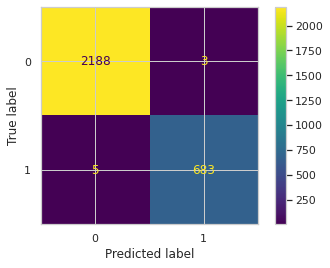

In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test5, y_pred)
c_report = classification_report(y_pred, y_test5)
c_matrix = confusion_matrix(y_test5, y_pred)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(classifier,X_test5,y_test5)

In [ ]:
print('kappa_statistic : %3f' % cohen_kappa_score(y_test5, y_pred))

kappa_statistic : 0.992353


In [ ]:
error = []
# Calculating the error rate for K-values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train5, y_train5)
    pred_i = knn.predict(X_test5)
    error.append(np.mean(pred_i != y_test5))

Text(0, 0.5, 'Mean Error')

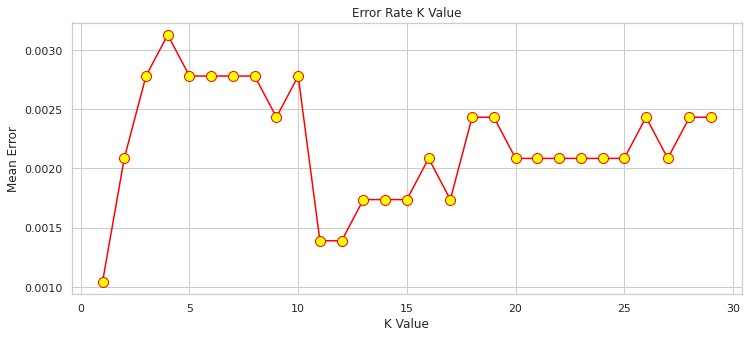

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='red', marker='o',
        markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## With Lasso and Ridge Regression


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [ ]:
# Dividing the data into training and testing set
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size=0.3, random_state =1)

In [ ]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train6, y_train6)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 9.686583586657608
0.5 : 9.68658358288679
0.75 : 9.686583579102596
1.0 : 9.686583575305043
1.25 : 9.686583571494165
1.5 : 9.686583567669985
1.75 : 9.686583563832524
2.0 : 9.686583559981814


In [ ]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train6, y_train6)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test6, y_test6))

0.978085838295698


In [ ]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train6, y_train6)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 9.614815194932367
0.5 : 9.589478915936585
0.75 : 9.55213845333159
1.0 : 9.516552848317552
1.25 : 9.475156542782733
1.5 : 9.427949536727127
1.75 : 9.374931830150738
2.0 : 9.316103423053562


In [ ]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train6, y_train6)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test6, y_test6))

0.953738506017536


In [ ]:
# Building the two lists for visualization
models = ['Ridge Regression', 'Lasso Regression']
scores = [ridgeModelChosen.score(X_test6, y_test6),
         lassoModelChosen.score(X_test6, y_test6)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test6, y_test6)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test6, y_test6)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Ridge Regression : 0.978085838295698
Lasso Regression : 0.953738506017536


In [ ]:
y_pred_ridge = ridgeModelChosen.predict(X_test6)
accuracy = accuracy_score(y_test6,np.round(abs(y_pred_ridge))) 
c_report = classification_report(np.round(abs(y_pred_ridge)), y_test6)
c_matrix = confusion_matrix(y_test6, np.round(abs(y_pred_ridge)))
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9972212573810351
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2187
         1.0       1.00      0.99      0.99       692

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Confusion matrix:
[[2185    6]
 [   2  686]]


In [ ]:
y_pred_lasso = lassoModelChosen.predict(X_test6)
accuracy = accuracy_score(y_test6,np.round(abs(y_pred_lasso))) 
c_report = classification_report(np.round(abs(y_pred_lasso)), y_test6)
c_matrix = confusion_matrix(y_test6, np.round(abs(y_pred_lasso)))
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9965265717262939
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2185
         1.0       1.00      0.99      0.99       694

    accuracy                           1.00      2879
   macro avg       1.00      0.99      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Confusion matrix:
[[2183    8]
 [   2  686]]


In [ ]:
print('kappa_statistic (ridge) : %3f' % cohen_kappa_score(y_test6, np.round(abs(y_pred_ridge))))

kappa_statistic (ridge) : 0.992376


In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test6, np.round(abs(y_pred_ridge))))

kappa_statistic (lasso): 0.992376


## KNN + GA


In [ ]:
!pip install --user pygad
#import pygad
import random 

     |████████████████████████████████| 53 kB 1.7 MB/s 


In [ ]:
#defining various steps required for the genetic algorithm
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        classifier.fit(X_train.iloc[:,chromosome],y_train)
        predictions = classifier.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train6,X_test=X_test6,y_train=y_train6,y_test=y_test6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[0.9993053143452588, 0.9993053143452588]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726

KNeighborsClassifier(n_neighbors=7)

In [ ]:
classifier.fit(X_train6.iloc[:,chromo[-1]],y_train6)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
predictions = classifier.predict(X_test6.iloc[:,chromo[-1]])

In [ ]:
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test6,predictions)))

Accuracy score after genetic algorithm is= 0.9982632858631469


In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test6, predictions)
c_report = classification_report(predictions, y_test6)
c_matrix = confusion_matrix(y_test6, predictions)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9888850295241404
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2207
           1       0.97      0.99      0.98       672

    accuracy                           0.99      2879
   macro avg       0.98      0.99      0.98      2879
weighted avg       0.99      0.99      0.99      2879

Confusion matrix:
[[2183    8]
 [  24  664]]


In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test6, predictions))

kappa_statistic (lasso): 0.969196


## KNN on oversampled data

In [ ]:
#train test split
X_train_over5, X_test_over5,y_train_over5, y_test_over5 = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state =1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train_over5, y_train_over5)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_over = classifier.predict(X_test_over5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2172
           1       1.00      1.00      1.00      2201

    accuracy                           1.00      4373
   macro avg       1.00      1.00      1.00      4373
weighted avg       1.00      1.00      1.00      4373

Classification report:
Accuracy:  0.9988566201692202
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2173
           1       1.00      1.00      1.00      2200

    accuracy                           1.00      4373
   macro avg       1.00      1.00      1.00      4373
weighted avg       1.00      1.00      1.00      4373

Confusion matrix:
[[2170    2]
 [   3 2198]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



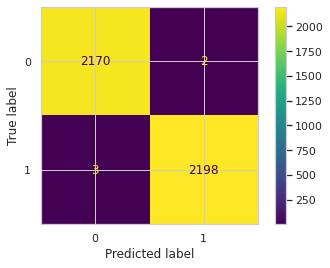

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_over5, y_pred_over))
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test_over5, y_pred_over)
c_report = classification_report(y_pred_over, y_test_over5)
c_matrix = confusion_matrix(y_test_over5, y_pred_over)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(classifier,X_test_over5,y_test_over5)

In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test_over5, y_pred_over))

kappa_statistic (lasso): 0.997713


## KNN on over-sampled date with lasso and ridge regression

In [ ]:
# Dividing the data into training and testing set
X_train_over6, X_test_over6,y_train_over6, y_test_over6 = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state =1)

In [ ]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train_over6, y_train_over6)
    scores = cross_val_score(ridgeModel, X_oversampled, y_oversampled, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : -27.03429660479252
0.5 : -27.03429551181675
0.75 : -27.034294420544043
1.0 : -27.03429333097191
1.25 : -27.034292243098022
1.5 : -27.03429115692003
1.75 : -27.034290072435528
2.0 : -27.034288989642114


In [ ]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train_over6, y_train_over6)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test_over6,y_test_over6))

0.9875810492821442


In [ ]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train_over6, y_train_over6)
    scores = cross_val_score(lassoModel, X_oversampled, y_oversampled, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : -41.046269920523166
0.5 : -37.357122808010395
0.75 : -35.65462598437925
1.0 : -35.21582078760186
1.25 : -35.90439351354634
1.5 : -37.68522379116944
1.75 : -40.286570643632935
2.0 : -43.69451235814125


In [ ]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train_over6, y_train_over6)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test_over6,y_test_over6))

0.9737540535751559


In [ ]:
# Building the two lists for visualization
models = ['Ridge Regression', 'Lasso Regression']
scores = [ridgeModelChosen.score(X_test_over6,y_test_over6),
         lassoModelChosen.score(X_test_over6,y_test_over6)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test_over6,y_test_over6)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test_over6,y_test_over6)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Ridge Regression : 0.9875810492821442
Lasso Regression : 0.9737540535751559


In [ ]:
y_pred_ridge_over = ridgeModelChosen.predict(X_test_over6)
accuracy = accuracy_score(y_test_over6,np.round(abs(y_pred_ridge_over)))
c_report = classification_report(np.round(abs(y_pred_ridge_over)), y_test_over6)
c_matrix = confusion_matrix(y_test_over6, np.round(abs(y_pred_ridge_over)))
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9979419163045964
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2169
         1.0       1.00      1.00      1.00      2204

    accuracy                           1.00      4373
   macro avg       1.00      1.00      1.00      4373
weighted avg       1.00      1.00      1.00      4373

Confusion matrix:
[[2166    6]
 [   3 2198]]


In [ ]:
y_pred_lasso_over = lassoModelChosen.predict(X_test_over6)
accuracy = accuracy_score(y_test_over6,np.round(abs(y_pred_lasso_over)))
c_report = classification_report(np.round(abs(y_pred_lasso_over)), y_test_over6)
c_matrix = confusion_matrix(y_test_over6, np.round(abs(y_pred_lasso_over)))
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9977132403384404
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2168
         1.0       1.00      1.00      1.00      2205

    accuracy                           1.00      4373
   macro avg       1.00      1.00      1.00      4373
weighted avg       1.00      1.00      1.00      4373

Confusion matrix:
[[2165    7]
 [   3 2198]]


In [ ]:
print('kappa_statistic (ridge): %3f' % cohen_kappa_score(y_test_over6, np.round(abs(y_pred_ridge_over))))

kappa_statistic (ridge): 0.995884


In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test_over6, np.round(abs(y_pred_lasso_over))))

kappa_statistic (lasso): 0.995426


##over sampled - knn + ga

In [ ]:
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train_over6,X_test=X_test_over6,y_train=y_train_over6,y_test=y_test_over6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[0.9996526571726294, 0.9993053143452588]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9993053143452588, 0.9993053143452588]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726

KNeighborsClassifier(n_neighbors=7)

In [ ]:
classifier.fit(X_train6.iloc[:,chromo[-1]],y_train6)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
predictions = classifier.predict(X_test_over6.iloc[:,chromo[-1]])

In [ ]:
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test_over6,predictions)))

Accuracy score after genetic algorithm is= 0.9807912188428997


In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test_over6, predictions)
c_report = classification_report(predictions, y_test_over6)
c_matrix = confusion_matrix(y_test_over6, predictions)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9807912188428997
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2238
           1       0.97      1.00      0.98      2135

    accuracy                           0.98      4373
   macro avg       0.98      0.98      0.98      4373
weighted avg       0.98      0.98      0.98      4373

Confusion matrix:
[[2163    9]
 [  75 2126]]


In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test_over6, predictions))

kappa_statistic (lasso): 0.961588


In [ ]:
# ## ROC curve
# skplt.metrics.plot_roc(y_test_over6, classifier.predict_proba(X_test_over6), plot_micro=False)
# plt.title('ROC KNN + GA for unbalanced Data')
# plt.show()

In [ ]:
#Yasaman

# Xgboost on Imbalance data

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


xgb_cl = xgb.XGBClassifier()

# Init classifier

# Fit
xgb_cl = xgb_cl.fit(X_train, y_train)

# Predict
xgb_preds = xgb_cl.predict(X_test)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_cl)
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xgb_preds)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_cl,X_test,y_test)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [ ]:
grid_cv.best_params_

In [ ]:
print('Classification Report')
print(classification_report(y_test, xgb_preds, digits=4))

#Xgboost on oversampled data


In [ ]:
# Fit
xgb_cl_over = xgb_cl.fit(X_train_over, y_train_over)

# Predict
xgb_preds = xgb_cl_over.predict(X_test_over)

In [ ]:
plot_importance(xgb_cl_over)
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
confusion_matrix(y_test_over, xgb_preds)

In [ ]:
plot_confusion_matrix(xgb_cl_over,X_test_over,y_test_over)
plt.show()

In [ ]:
# Fit Grid Search for oversampled data
_ = grid_cv.fit(X_train_over, y_train_over)

In [ ]:
grid_cv.best_params_

# Logistic Regression on Imbalanced data

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds_LR = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
print('Classification Report')
print(classification_report(y_test, preds_LR, digits=4))

In [ ]:
plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [ ]:
param_grid={
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"],
    "solver":['liblinear']
    }# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

# Logistic Regression on oversampled data

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_over, y_train_over)
preds_LR = clf.predict(X_test_over)
print('Classification Report')
print(classification_report(y_test_over, preds_LR, digits=4))
plot_confusion_matrix(clf,X_test_over,y_test_over)
plt.show()

In [ ]:

logreg_cv.fit(X_train_over,y_train_over)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

## Random Forest on In-Balanced Dataset

RandomForestClassifier()
RF's Accuracy on raw dataset is:  99.93053143452588
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2191
           1       1.00      1.00      1.00       688

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 0.999305
Precision : 1.000000
Recall : 0.997093
F1 : 0.998544
kappa_statistic : 0.998088


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


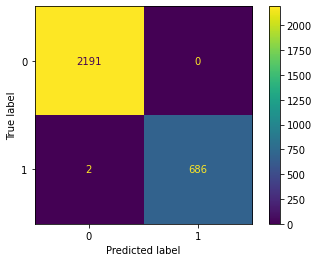

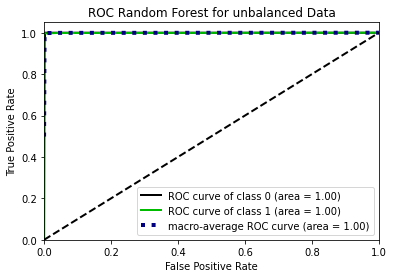

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer,mean_squared_error

scaler = StandardScaler()
X_train1, X_test1,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1)
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)



rf_model = RandomForestClassifier().fit(X_train,y_train)
print(rf_model)

dump(rf_model, 'rf_model.joblib')
loaded_rf_model= load('rf_model.joblib')

##testing the model
y_pred_rf = loaded_rf_model.predict(X_test)
y_pred_rf


x = metrics.accuracy_score(y_test, y_pred_rf)
print("RF's Accuracy on raw dataset is: ", x*100)
print(classification_report(y_test, y_pred_rf))

# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_rf))
print('Precision : %3f' % precision_score(y_test, y_pred_rf))
print('Recall : %3f' % recall_score(y_test, y_pred_rf))
print('F1 : %3f' % f1_score(y_test, y_pred_rf))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_rf))

##confusion matrix
plot_confusion_matrix(rf_model,X_test,y_test)
plt.show()

## ROC curve

## ROC curve
skplt.metrics.plot_roc(y_test, rf_model.predict_proba(X_test), plot_micro=False)
plt.title('ROC Random Forest for unbalanced Data')
plt.show()


### Grid Search On In-Balanced data

In [ ]:
rfc=RandomForestClassifier(random_state=1)
param_grid = { 
    'n_estimators': [1, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [ ]:
CV_rfc.best_params_



{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
rf_model_grid=RandomForestClassifier(random_state=1, max_features='auto', n_estimators= 100, max_depth=5, criterion='gini')

rf_model_grid.fit(X_train, y_train)

dump(rf_model_grid, 'rf_model_grid.joblib')
loaded_rf_model_grid= load('rf_model_grid.joblib')


pred_rf_grid=loaded_rf_model_grid.predict(X_test)
print("Accuracy for Random Forest with grid_search : ",accuracy_score(y_test, pred_rf_grid))

Accuracy for Random Forest with grid_search :  0.9993053143452588


In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, pred_rf_grid))
print('Precision : %3f' % precision_score(y_test, pred_rf_grid))
print('Recall : %3f' % recall_score(y_test, pred_rf_grid))
print('F1 : %3f' % f1_score(y_test, pred_rf_grid))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, pred_rf_grid))

Accuracy : 0.999305
Precision : 1.000000
Recall : 0.997093
F1 : 0.998544
kappa_statistic : 0.998088


### Random Forest on OverSampled Data

RandomForestClassifier()
RF's Accuracy is on oversampled data :  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2172
           1       1.00      1.00      1.00      2201

    accuracy                           1.00      4373
   macro avg       1.00      1.00      1.00      4373
weighted avg       1.00      1.00      1.00      4373

Accuracy : 1.000000
Precision : 1.000000
Recall : 1.000000
F1 : 1.000000
kappa_statistic : 1.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


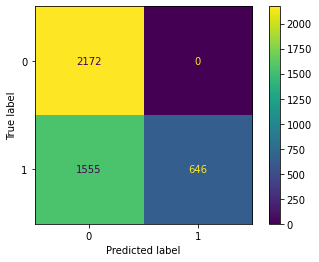

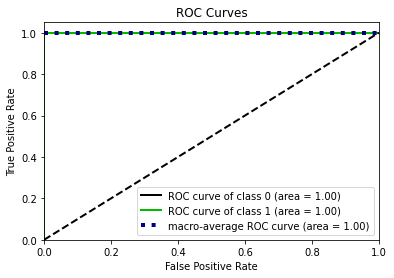

In [ ]:


## training the model
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


rf_model_over = RandomForestClassifier().fit(X_train_over,y_train_over)
print(rf_model_over)

dump(rf_model_over, 'rf_model_over.joblib')
loaded_rf_model_over= load('rf_model_over.joblib')

##testing the model

y_pred_rf_over = loaded_rf_model_over.predict(X_test_over)
y_pred_rf_over

x = metrics.accuracy_score(y_test_over , y_pred_rf_over)
print("RF's Accuracy is on oversampled data : ", x*100)
print(classification_report(y_test_over , y_pred_rf_over))


# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_over, y_pred_rf_over))
print('Precision : %3f' % precision_score(y_test_over, y_pred_rf_over))
print('Recall : %3f' % recall_score(y_test_over, y_pred_rf_over))
print('F1 : %3f' % f1_score(y_test_over, y_pred_rf_over))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, y_pred_rf_over))


##confusion matrix
plot_confusion_matrix(rf_model,X_test_over,y_test_over)
plt.show()

## ROC curve
skplt.metrics.plot_roc(y_test_over, rf_model_over.predict_proba(X_test_over), plot_micro=False)
plt.show()

### Grid Search on OverSampling Data

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [1, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_over,y_train_over)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
rf_model_grid_over=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')

rf_model_grid_over.fit(X_train_over,y_train_over)

dump(rf_model_grid_over, 'rf_model_grid_over.joblib')
loaded_rf_model_grid_over= load('rf_model_grid_over.joblib')

pred_rf_grid_over=loaded_rf_model_grid_over.predict(X_test_over)
print("Accuracy for Random Forest with grid_search : ",accuracy_score(y_test_over, pred_rf_grid_over))

Accuracy for Random Forest with grid_search :  0.9995426480676881


In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_over, pred_rf_grid_over))
print('Precision : %3f' % precision_score(y_test_over, pred_rf_grid_over))
print('Recall : %3f' % recall_score(y_test_over, pred_rf_grid_over))
print('F1 : %3f' % f1_score(y_test_over, pred_rf_grid_over))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, pred_rf_grid_over))

Accuracy : 0.999543
Precision : 1.000000
Recall : 0.999091
F1 : 0.999545
kappa_statistic : 0.999085
